In [93]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
# from sklearn.decomposition import PCA

In [62]:
df = pd.read_csv('/content/ecommerce_customer_churn_dataset - ecommerce_customer_churn_dataset.csv')

In [63]:
# You have to apply All Feature Enginnering work step by step :
# StandardScaler,
# MinMaxScaler,
# All type Encoding ,
# Column Transformer,
# Outlier Hnadling ,
# CCA  if there are missing data

In [64]:
df.head(5)

,Age,Gender,Country,City,Membership_Years,Login_Frequency,Session_Duration_Avg,Pages_Per_Session,Cart_Abandonment_Rate,Wishlist_Items,...,Email_Open_Rate,Customer_Service_Calls,Product_Reviews_Written,Social_Media_Engagement_Score,Mobile_App_Usage,Payment_Method_Diversity,Lifetime_Value,Credit_Balance,Churned,Signup_Quarter
0,43.0,Male,France,Marseille,2.9,14,27.4,6.0,50.6,3.0,...,17.9,9.0,4.0,16.3,20.8,1.0,953.33,2278.0,0,Q1
1,36.0,Male,UK,Manchester,1.6,15,42.7,10.3,37.7,1.0,...,42.8,7.0,3.0,NaN,23.3,3.0,1067.47,3028.0,0,Q4
2,45.0,Female,Canada,Vancouver,2.9,10,24.8,1.6,70.9,1.0,...,0.0,4.0,1.0,NaN,8.8,NaN,1289.75,2317.0,0,Q4
3,56.0,Female,USA,New York,2.6,10,38.4,14.8,41.7,9.0,...,41.4,2.0,5.0,85.9,31.0,3.0,2340.92,2674.0,0,Q1
4,35.0,Male,India,Delhi,3.1,29,51.4,NaN,19.1,9.0,...,37.9,1.0,11.0,83.0,50.4,4.0,3041.29,5354.0,0,Q4


In [98]:
# Standard Scaler
X = df.drop(columns=["Marital Status"])
y = df["Marital Status"]

In [66]:
num_cols = X.select_dtypes(include=["int64","float64"]).columns
cat_cols = X.select_dtypes(include=["object"]).columns


In [67]:
df.head(4)

,Age,Gender,Country,City,Membership_Years,Login_Frequency,Session_Duration_Avg,Pages_Per_Session,Cart_Abandonment_Rate,Wishlist_Items,...,Email_Open_Rate,Customer_Service_Calls,Product_Reviews_Written,Social_Media_Engagement_Score,Mobile_App_Usage,Payment_Method_Diversity,Lifetime_Value,Credit_Balance,Churned,Signup_Quarter
0,43.0,Male,France,Marseille,2.9,14,27.4,6.0,50.6,3.0,...,17.9,9.0,4.0,16.3,20.8,1.0,953.33,2278.0,0,Q1
1,36.0,Male,UK,Manchester,1.6,15,42.7,10.3,37.7,1.0,...,42.8,7.0,3.0,NaN,23.3,3.0,1067.47,3028.0,0,Q4
2,45.0,Female,Canada,Vancouver,2.9,10,24.8,1.6,70.9,1.0,...,0.0,4.0,1.0,NaN,8.8,NaN,1289.75,2317.0,0,Q4
3,56.0,Female,USA,New York,2.6,10,38.4,14.8,41.7,9.0,...,41.4,2.0,5.0,85.9,31.0,3.0,2340.92,2674.0,0,Q1


In [68]:
df.isnull().sum()

,0
Age,2495
Gender,0
Country,0
City,0
Membership_Years,0
Login_Frequency,0
Session_Duration_Avg,3399
Pages_Per_Session,3000
Cart_Abandonment_Rate,0
Wishlist_Items,4000


In [69]:
x = df.drop(columns=['Credit_Balance'])
y = df['Credit_Balance']


In [70]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [71]:
standard_scaler = ColumnTransformer(
    transformers=[
        ('num_scaling', StandardScaler(), num_cols)
    ],
    remainder='passthrough'
)

In [72]:
x_train_scaled = standard_scaler.fit_transform(x_train)
x_test_scaled = standard_scaler.transform(x_test)

In [73]:
df.head(3)

,Age,Gender,Country,City,Membership_Years,Login_Frequency,Session_Duration_Avg,Pages_Per_Session,Cart_Abandonment_Rate,Wishlist_Items,...,Email_Open_Rate,Customer_Service_Calls,Product_Reviews_Written,Social_Media_Engagement_Score,Mobile_App_Usage,Payment_Method_Diversity,Lifetime_Value,Credit_Balance,Churned,Signup_Quarter
0,43.0,Male,France,Marseille,2.9,14,27.4,6.0,50.6,3.0,...,17.9,9.0,4.0,16.3,20.8,1.0,953.33,2278.0,0,Q1
1,36.0,Male,UK,Manchester,1.6,15,42.7,10.3,37.7,1.0,...,42.8,7.0,3.0,NaN,23.3,3.0,1067.47,3028.0,0,Q4
2,45.0,Female,Canada,Vancouver,2.9,10,24.8,1.6,70.9,1.0,...,0.0,4.0,1.0,NaN,8.8,NaN,1289.75,2317.0,0,Q4


In [74]:
x_train.shape
x_train_scaled.shape


(40000, 24)

In [75]:
# MinMax scaler
minmax_scaler = ColumnTransformer(
    transformers=[
        ('num_scaling', MinMaxScaler(), num_cols)
    ],
    remainder='passthrough'
)


In [76]:
x_train_minmax = minmax_scaler.fit_transform(x_train)
x_test_minmax = minmax_scaler.transform(x_test)


In [77]:
x_train.shape
x_train_minmax.shape


(40000, 24)

In [78]:
df.head(10)

,Age,Gender,Country,City,Membership_Years,Login_Frequency,Session_Duration_Avg,Pages_Per_Session,Cart_Abandonment_Rate,Wishlist_Items,...,Email_Open_Rate,Customer_Service_Calls,Product_Reviews_Written,Social_Media_Engagement_Score,Mobile_App_Usage,Payment_Method_Diversity,Lifetime_Value,Credit_Balance,Churned,Signup_Quarter
0,43.0,Male,France,Marseille,2.9,14,27.4,6.0,50.6,3.0,...,17.9,9.0,4.0,16.3,20.8,1.0,953.33,2278.0,0,Q1
1,36.0,Male,UK,Manchester,1.6,15,42.7,10.3,37.7,1.0,...,42.8,7.0,3.0,NaN,23.3,3.0,1067.47,3028.0,0,Q4
2,45.0,Female,Canada,Vancouver,2.9,10,24.8,1.6,70.9,1.0,...,0.0,4.0,1.0,NaN,8.8,NaN,1289.75,2317.0,0,Q4
3,56.0,Female,USA,New York,2.6,10,38.4,14.8,41.7,9.0,...,41.4,2.0,5.0,85.9,31.0,3.0,2340.92,2674.0,0,Q1
4,35.0,Male,India,Delhi,3.1,29,51.4,NaN,19.1,9.0,...,37.9,1.0,11.0,83.0,50.4,4.0,3041.29,5354.0,0,Q4
5,35.0,Male,Japan,Tokyo,3.5,6,21.9,6.9,74.4,0.0,...,16.0,8.0,2.0,14.3,11.2,2.0,1995.43,2418.0,1,Q1
6,56.0,Male,Germany,Berlin,1.9,24,46.4,13.9,36.2,5.0,...,35.5,4.0,6.0,68.8,42.9,5.0,3003.57,2657.0,0,Q1
7,47.0,Female,USA,Houston,1.6,14,24.1,8.3,59.9,2.0,...,5.5,5.0,NaN,30.1,7.6,2.0,1394.04,2274.0,0,Q4
8,32.0,Male,Canada,Calgary,1.3,14,NaN,7.4,66.5,4.0,...,19.0,2.0,0.0,0.0,18.7,2.0,537.21,534.0,0,Q1
9,44.0,Male,USA,New York,3.6,13,31.3,5.4,62.6,3.0,...,11.7,2.0,1.0,13.5,21.5,2.0,807.84,977.0,0,Q2


In [79]:
oe = OrdinalEncoder()
df['Gender'] = oe.fit_transform(df[['Gender']])

In [80]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(drop='first')
encoded = ohe.fit_transform(df[['Gender']])

In [81]:
df.head(3)

,Age,Gender,Country,City,Membership_Years,Login_Frequency,Session_Duration_Avg,Pages_Per_Session,Cart_Abandonment_Rate,Wishlist_Items,...,Email_Open_Rate,Customer_Service_Calls,Product_Reviews_Written,Social_Media_Engagement_Score,Mobile_App_Usage,Payment_Method_Diversity,Lifetime_Value,Credit_Balance,Churned,Signup_Quarter
0,43.0,1.0,France,Marseille,2.9,14,27.4,6.0,50.6,3.0,...,17.9,9.0,4.0,16.3,20.8,1.0,953.33,2278.0,0,Q1
1,36.0,1.0,UK,Manchester,1.6,15,42.7,10.3,37.7,1.0,...,42.8,7.0,3.0,NaN,23.3,3.0,1067.47,3028.0,0,Q4
2,45.0,0.0,Canada,Vancouver,2.9,10,24.8,1.6,70.9,1.0,...,0.0,4.0,1.0,NaN,8.8,NaN,1289.75,2317.0,0,Q4


In [84]:
lb = LabelEncoder()

df['Gender'] = lb.fit_transform(df['Gender'])
df['Education Level'] = lb.fit_transform(df['Country'])
df['Marital Status'] = lb.fit_transform(df['City'])

In [85]:
from sklearn.impute import SimpleImputer

si = SimpleImputer(strategy='mean')
df[num_cols] = si.fit_transform(df[num_cols])


In [86]:
df.head(6)

,Age,Gender,Country,City,Membership_Years,Login_Frequency,Session_Duration_Avg,Pages_Per_Session,Cart_Abandonment_Rate,Wishlist_Items,...,Product_Reviews_Written,Social_Media_Engagement_Score,Mobile_App_Usage,Payment_Method_Diversity,Lifetime_Value,Credit_Balance,Churned,Signup_Quarter,Education Level,Marital Status
0,43.0,1,France,Marseille,2.9,14.0,27.4,6.000000,50.6,3.0,...,4.0,16.300000,20.8,1.000000,953.33,2278.0,0,Q1,2,21
1,36.0,1,UK,Manchester,1.6,15.0,42.7,10.300000,37.7,1.0,...,3.0,29.364466,23.3,3.000000,1067.47,3028.0,0,Q4,6,20
2,45.0,0,Canada,Vancouver,2.9,10.0,24.8,1.600000,70.9,1.0,...,1.0,29.364466,8.8,2.353874,1289.75,2317.0,0,Q4,1,38
3,56.0,0,USA,New York,2.6,10.0,38.4,14.800000,41.7,9.0,...,5.0,85.900000,31.0,3.000000,2340.92,2674.0,0,Q1,7,27
4,35.0,1,India,Delhi,3.1,29.0,51.4,8.737811,19.1,9.0,...,11.0,83.000000,50.4,4.000000,3041.29,5354.0,0,Q4,4,9
5,35.0,1,Japan,Tokyo,3.5,6.0,21.9,6.900000,74.4,0.0,...,2.0,14.300000,11.2,2.000000,1995.43,2418.0,1,Q1,5,35


In [89]:
preprocessor = ColumnTransformer(
    transformers=[

        ('num',
         Pipeline(steps=[
             ('imputer', SimpleImputer(strategy='mean')),
             ('scaler', StandardScaler())
         ]),
         num_cols),

        ('cat',
         Pipeline(steps=[
             ('imputer', SimpleImputer(strategy='most_frequent')),
             ('encoder', OneHotEncoder(drop='first', handle_unknown='ignore'))
         ]),
         cat_cols)
    ]
)


In [90]:
X_transformed = preprocessor.fit_transform(df)


In [91]:
df.head(4)

,Age,Gender,Country,City,Membership_Years,Login_Frequency,Session_Duration_Avg,Pages_Per_Session,Cart_Abandonment_Rate,Wishlist_Items,...,Product_Reviews_Written,Social_Media_Engagement_Score,Mobile_App_Usage,Payment_Method_Diversity,Lifetime_Value,Credit_Balance,Churned,Signup_Quarter,Education Level,Marital Status
0,43.0,1,France,Marseille,2.9,14.0,27.4,6.0,50.6,3.0,...,4.0,16.300000,20.8,1.000000,953.33,2278.0,0,Q1,2,21
1,36.0,1,UK,Manchester,1.6,15.0,42.7,10.3,37.7,1.0,...,3.0,29.364466,23.3,3.000000,1067.47,3028.0,0,Q4,6,20
2,45.0,0,Canada,Vancouver,2.9,10.0,24.8,1.6,70.9,1.0,...,1.0,29.364466,8.8,2.353874,1289.75,2317.0,0,Q4,1,38
3,56.0,0,USA,New York,2.6,10.0,38.4,14.8,41.7,9.0,...,5.0,85.900000,31.0,3.000000,2340.92,2674.0,0,Q1,7,27


In [92]:
# Outlier handeling

In [139]:
df['Credit_Balance'] = pd.to_numeric(df['Credit_Balance'], errors='ignore')


/tmp/ipython-input-98391682.py:1: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df['Credit_Balance'] = pd.to_numeric(df['Credit_Balance'], errors='ignore')


<Axes: xlabel='Credit_Balance'>

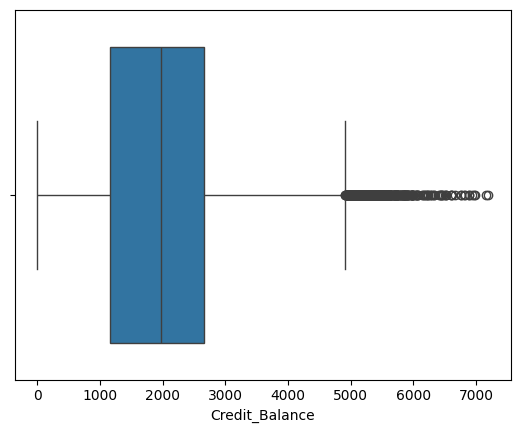

In [122]:
sns.boxplot(x=df['Credit_Balance'])


In [124]:
percentile25 = df['Credit_Balance'].quantile(0.25)
percentile75 = df['Credit_Balance'].quantile(0.75)

In [125]:
percentile25

np.float64(1164.0)

In [126]:
percentile75

np.float64(2664.0)

In [127]:
IQR = percentile75 - percentile25
IQR

np.float64(1500.0)

In [128]:
upper_fence = percentile75 + 1.5 * (IQR)
lower_fence = percentile25 - 1.5 * (IQR)
print("Upper Limit: ", upper_fence)
print("Lower Limit: ", lower_fence)

Upper Limit:  4914.0
Lower Limit:  -1086.0


In [129]:
df.head(3)

,Age,Gender,Country,City,Membership_Years,Login_Frequency,Session_Duration_Avg,Pages_Per_Session,Cart_Abandonment_Rate,Wishlist_Items,...,Product_Reviews_Written,Social_Media_Engagement_Score,Mobile_App_Usage,Payment_Method_Diversity,Lifetime_Value,Credit_Balance,Churned,Signup_Quarter,Education Level,Marital Status
0,43.0,1,France,Marseille,2.9,14.0,27.4,6.0,50.6,3.0,...,4.0,16.300000,20.8,1.000000,953.33,2278.0,0,Q1,2,21
1,36.0,1,UK,Manchester,1.6,15.0,42.7,10.3,37.7,1.0,...,3.0,29.364466,23.3,3.000000,1067.47,3028.0,0,Q4,6,20
2,45.0,0,Canada,Vancouver,2.9,10.0,24.8,1.6,70.9,1.0,...,1.0,29.364466,8.8,2.353874,1289.75,2317.0,0,Q4,1,38


In [130]:
df[df['Credit_Balance'] > upper_fence]
df[df['Credit_Balance'] < lower_fence]

,Age,Gender,Country,City,Membership_Years,Login_Frequency,Session_Duration_Avg,Pages_Per_Session,Cart_Abandonment_Rate,Wishlist_Items,...,Product_Reviews_Written,Social_Media_Engagement_Score,Mobile_App_Usage,Payment_Method_Diversity,Lifetime_Value,Credit_Balance,Churned,Signup_Quarter,Education Level,Marital Status


In [131]:
df[df['Credit_Balance'] > upper_fence]

,Age,Gender,Country,City,Membership_Years,Login_Frequency,Session_Duration_Avg,Pages_Per_Session,Cart_Abandonment_Rate,Wishlist_Items,...,Product_Reviews_Written,Social_Media_Engagement_Score,Mobile_App_Usage,Payment_Method_Diversity,Lifetime_Value,Credit_Balance,Churned,Signup_Quarter,Education Level,Marital Status
4,35.000000,1,India,Delhi,3.1,29.0,51.4,8.737811,19.1,9.000000,...,11.0,83.000000,50.4,4.0,3041.29,5354.0,0,Q4,4,9
99,35.000000,1,Canada,Montreal,2.8,21.0,40.1,14.100000,42.0,9.000000,...,3.0,49.200000,34.2,1.0,1467.19,5993.0,0,Q3,1,23
251,49.000000,0,Canada,Calgary,1.3,33.0,66.4,20.300000,10.1,16.000000,...,3.0,29.364466,44.8,2.0,1867.49,6187.0,0,Q2,1,5
279,33.000000,1,UK,Birmingham,8.0,19.0,49.4,15.900000,38.8,5.000000,...,7.0,86.200000,32.9,2.0,4412.91,5330.0,0,Q2,6,3
294,42.000000,0,USA,Chicago,8.8,39.0,69.1,20.900000,1.3,10.000000,...,7.0,84.400000,48.5,2.0,2659.41,4963.0,0,Q4,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49546,30.000000,1,India,Chennai,0.4,26.0,41.1,12.400000,51.1,7.000000,...,5.0,46.800000,32.8,2.0,1145.16,5178.0,0,Q2,4,6
49711,37.802968,0,UK,Glasgow,1.2,25.0,60.2,22.600000,26.2,11.000000,...,9.0,74.900000,45.6,3.0,4318.47,6804.0,0,Q4,6,11
49762,54.000000,0,Canada,Calgary,2.9,18.0,39.9,14.800000,5.4,6.000000,...,8.0,75.400000,35.8,2.0,2310.25,5619.0,0,Q3,1,5
49829,51.000000,1,Australia,Sydney,0.7,17.0,46.0,15.300000,36.9,6.000000,...,7.0,44.400000,33.3,3.0,4203.04,5155.0,0,Q2,0,34


In [132]:
df[df['Credit_Balance'] < lower_fence]

,Age,Gender,Country,City,Membership_Years,Login_Frequency,Session_Duration_Avg,Pages_Per_Session,Cart_Abandonment_Rate,Wishlist_Items,...,Product_Reviews_Written,Social_Media_Engagement_Score,Mobile_App_Usage,Payment_Method_Diversity,Lifetime_Value,Credit_Balance,Churned,Signup_Quarter,Education Level,Marital Status


In [133]:
new_df = df[df['Credit_Balance'] < upper_fence]
new_df

,Age,Gender,Country,City,Membership_Years,Login_Frequency,Session_Duration_Avg,Pages_Per_Session,Cart_Abandonment_Rate,Wishlist_Items,...,Product_Reviews_Written,Social_Media_Engagement_Score,Mobile_App_Usage,Payment_Method_Diversity,Lifetime_Value,Credit_Balance,Churned,Signup_Quarter,Education Level,Marital Status
0,43.0,1,France,Marseille,2.9,14.0,27.4,6.000000,50.6,3.0,...,4.0,16.300000,20.800000,1.000000,953.33,2278.0,0,Q1,2,21
1,36.0,1,UK,Manchester,1.6,15.0,42.7,10.300000,37.7,1.0,...,3.0,29.364466,23.300000,3.000000,1067.47,3028.0,0,Q4,6,20
2,45.0,0,Canada,Vancouver,2.9,10.0,24.8,1.600000,70.9,1.0,...,1.0,29.364466,8.800000,2.353874,1289.75,2317.0,0,Q4,1,38
3,56.0,0,USA,New York,2.6,10.0,38.4,14.800000,41.7,9.0,...,5.0,85.900000,31.000000,3.000000,2340.92,2674.0,0,Q1,7,27
5,35.0,1,Japan,Tokyo,3.5,6.0,21.9,6.900000,74.4,0.0,...,2.0,14.300000,11.200000,2.000000,1995.43,2418.0,1,Q1,5,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,38.0,0,USA,Los Angeles,10.0,10.0,35.8,8.800000,51.2,3.0,...,1.0,20.700000,25.200000,1.000000,2365.98,3499.0,0,Q2,7,18
49996,37.0,1,USA,Chicago,1.4,21.0,32.4,9.600000,32.5,2.0,...,3.0,38.600000,12.100000,4.000000,1293.60,3154.0,0,Q3,7,7
49997,44.0,0,USA,Phoenix,2.8,19.0,40.3,10.400000,50.6,1.0,...,6.0,59.900000,19.371607,1.000000,1655.28,1622.0,0,Q1,7,33
49998,41.0,0,USA,Chicago,2.9,17.0,29.9,10.100000,60.8,1.0,...,2.0,29.364466,14.100000,3.000000,1286.11,2634.0,0,Q2,7,7


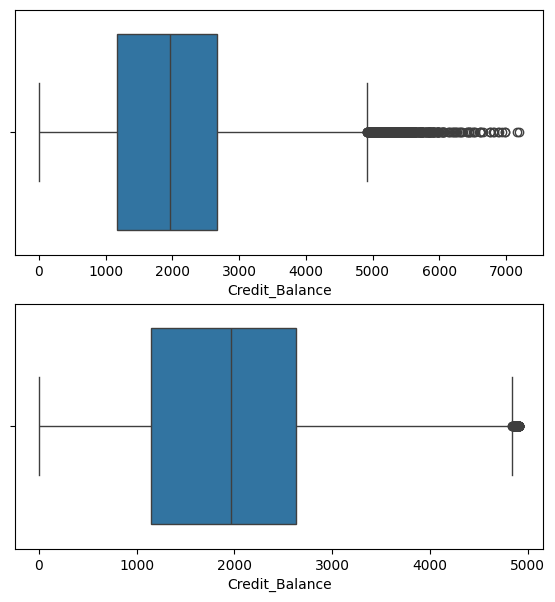

In [134]:
import matplotlib.pyplot as plt
## Comparison
plt.figure(figsize= (15,7))

plt.subplot(222) # 2 X 2 X 2 Grid
sns.boxplot(x = df['Credit_Balance'])

plt.subplot(224) #Again uses a 2 × 2 grid., 224 means 4th position (bottom-right).
sns.boxplot(x = new_df['Credit_Balance'])

plt.show()

In [115]:
new_df_cap = df.copy()

In [135]:
import numpy as np

new_df_cap['Credit_Balance'] = np.where(
    new_df_cap['Credit_Balance'] > upper_fence, #np.where(condition, value_if_true, value_if_false)
    upper_fence,
    np.where(
        new_df_cap['Credit_Balance'] < lower_fence,
        lower_fence,
        new_df_cap['Credit_Balance']
    )
)

In [136]:
df.head(4)

,Age,Gender,Country,City,Membership_Years,Login_Frequency,Session_Duration_Avg,Pages_Per_Session,Cart_Abandonment_Rate,Wishlist_Items,...,Product_Reviews_Written,Social_Media_Engagement_Score,Mobile_App_Usage,Payment_Method_Diversity,Lifetime_Value,Credit_Balance,Churned,Signup_Quarter,Education Level,Marital Status
0,43.0,1,France,Marseille,2.9,14.0,27.4,6.0,50.6,3.0,...,4.0,16.300000,20.8,1.000000,953.33,2278.0,0,Q1,2,21
1,36.0,1,UK,Manchester,1.6,15.0,42.7,10.3,37.7,1.0,...,3.0,29.364466,23.3,3.000000,1067.47,3028.0,0,Q4,6,20
2,45.0,0,Canada,Vancouver,2.9,10.0,24.8,1.6,70.9,1.0,...,1.0,29.364466,8.8,2.353874,1289.75,2317.0,0,Q4,1,38
3,56.0,0,USA,New York,2.6,10.0,38.4,14.8,41.7,9.0,...,5.0,85.900000,31.0,3.000000,2340.92,2674.0,0,Q1,7,27


In [137]:
new_df_cap['Credit_Balance'] = new_df_cap['Credit_Balance'].clip(lower_fence, upper_fence)

In [138]:
new_df_cap

,Age,Gender,Country,City,Membership_Years,Login_Frequency,Session_Duration_Avg,Pages_Per_Session,Cart_Abandonment_Rate,Wishlist_Items,...,Product_Reviews_Written,Social_Media_Engagement_Score,Mobile_App_Usage,Payment_Method_Diversity,Lifetime_Value,Credit_Balance,Churned,Signup_Quarter,Education Level,Marital Status
0,43.0,1,France,Marseille,2.9,14.0,27.4,6.000000,50.6,3.0,...,4.0,16.300000,20.800000,1.000000,953.33,2278.0,0,Q1,2,21.0
1,36.0,1,UK,Manchester,1.6,15.0,42.7,10.300000,37.7,1.0,...,3.0,29.364466,23.300000,3.000000,1067.47,3028.0,0,Q4,6,20.0
2,45.0,0,Canada,Vancouver,2.9,10.0,24.8,1.600000,70.9,1.0,...,1.0,29.364466,8.800000,2.353874,1289.75,2317.0,0,Q4,1,38.0
3,56.0,0,USA,New York,2.6,10.0,38.4,14.800000,41.7,9.0,...,5.0,85.900000,31.000000,3.000000,2340.92,2674.0,0,Q1,7,27.0
4,35.0,1,India,Delhi,3.1,29.0,51.4,8.737811,19.1,9.0,...,11.0,83.000000,50.400000,4.000000,3041.29,4914.0,0,Q4,4,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,38.0,0,USA,Los Angeles,10.0,10.0,35.8,8.800000,51.2,3.0,...,1.0,20.700000,25.200000,1.000000,2365.98,3499.0,0,Q2,7,18.0
49996,37.0,1,USA,Chicago,1.4,21.0,32.4,9.600000,32.5,2.0,...,3.0,38.600000,12.100000,4.000000,1293.60,3154.0,0,Q3,7,7.0
49997,44.0,0,USA,Phoenix,2.8,19.0,40.3,10.400000,50.6,1.0,...,6.0,59.900000,19.371607,1.000000,1655.28,1622.0,0,Q1,7,33.0
49998,41.0,0,USA,Chicago,2.9,17.0,29.9,10.100000,60.8,1.0,...,2.0,29.364466,14.100000,3.000000,1286.11,2634.0,0,Q2,7,7.0


In [140]:
# CCA

In [145]:
df=pd.read_csv('/content/ecommerce_customer_churn_dataset - ecommerce_customer_churn_dataset.csv')

In [146]:
df.isnull().mean()*100

,0
Age,4.990
Gender,0.000
Country,0.000
City,0.000
Membership_Years,0.000
Login_Frequency,0.000
Session_Duration_Avg,6.798
Pages_Per_Session,6.000
Cart_Abandonment_Rate,0.000
Wishlist_Items,8.000


In [147]:
cols = [var for var in df.columns if df[var].isnull().mean()<0.50 and df[var].isnull().mean() > 0]
cols

['Age',
 'Session_Duration_Avg',
 'Pages_Per_Session',
 'Wishlist_Items',
 'Days_Since_Last_Purchase',
 'Discount_Usage_Rate',
 'Returns_Rate',
 'Email_Open_Rate',
 'Customer_Service_Calls',
 'Product_Reviews_Written',
 'Social_Media_Engagement_Score',
 'Mobile_App_Usage',
 'Payment_Method_Diversity',
 'Credit_Balance']

In [148]:
df[cols].sample(5)

,Age,Session_Duration_Avg,Pages_Per_Session,Wishlist_Items,Days_Since_Last_Purchase,Discount_Usage_Rate,Returns_Rate,Email_Open_Rate,Customer_Service_Calls,Product_Reviews_Written,Social_Media_Engagement_Score,Mobile_App_Usage,Payment_Method_Diversity,Credit_Balance
1475,45.0,40.7,14.3,6.0,4.0,26.00,1.7,30.8,2.0,5.0,NaN,22.0,1.0,1745.0
3694,48.0,8.6,5.8,1.0,61.0,31.50,NaN,0.0,11.0,0.0,0.0,8.5,2.0,0.0
34521,28.0,NaN,9.5,4.0,69.0,26.70,NaN,31.1,9.0,7.0,43.0,NaN,2.0,3312.0
4547,37.0,20.3,4.7,NaN,15.0,14.80,8.8,8.5,4.0,1.0,NaN,13.2,3.0,742.0
6052,33.0,40.8,10.0,8.0,71.0,104.64,1.3,37.2,4.0,4.0,NaN,36.4,3.0,2580.0


In [149]:
df['Credit_Balance'].value_counts()

,count
Credit_Balance,
0.0,2713
1932.0,25
1113.0,25
1836.0,24
1660.0,24
...,...
4724.0,1
5325.0,1
4904.0,1


In [150]:
len(df[cols].dropna()) / len(df)

0.35966

In [151]:
new_df = df[cols].dropna()
df.shape , new_df.shape

((50000, 25), (17983, 14))

<Axes: >

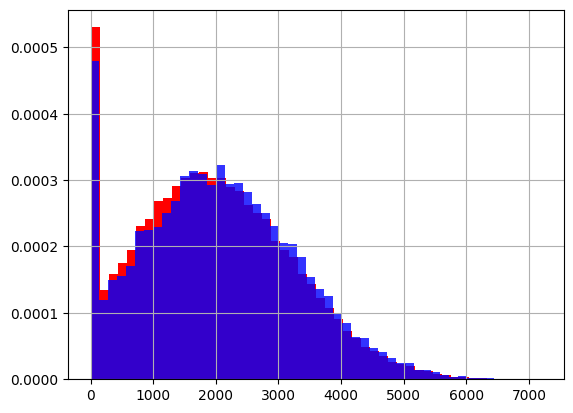

In [153]:
fig = plt.figure()
ax = fig.add_subplot(111)

# Original Data
df['Credit_Balance'].hist(bins = 50, ax = ax , density=True , color = 'red')

# data after cca , the argument alpha makes the color transparent so we can
# see the overlay of the 2 distribution
new_df['Credit_Balance'].hist(bins = 50, ax = ax , density=True , color = 'blue' , alpha = 0.8)

# plt.show()